# 1-dimensional random walk - notes

## PHYS481 week 02
see Reif pages 5-10

If we flip a coin it will land either showing heads (with probability $p$) or tails (with probability $q$).  The union of all possible outcomes will occur with probability 1, so that

  $$ q = 1 - p $$

### What if the registrar would let us gamble with grades?

Imagine that you could choose to flip a coin and if it landed heads-up then your assignment grade would be increased by 1%.  However, if instead the coin landed with tails facing up then your grade is reduced by 1%.

You are also allowed to flip the coin as many times as you want.  What is the best strategy if $p=q$? What if $p<q$ or $p>q$?  (We will ignore the trivial cases where $p=0$ or $q=0$)

After trying some number of flips $N$ your grade will be changed by some integer amount $x$

  $$ -N \le x \le +N $$ 
  
where larger $N$ will increase the best case gain and worst case loss.

In general we would like to know the probability not just of the most extreme cases, but of all possible outcomes after $N$ flips

  $$ P_N(x) $$

Let $n_+$ be the number of winning outcomes and $n_-$ the number of losses.  The net change $x$ will be

  $$ x= n_+ - n_- $$

and of course 
 
  $$ N = n_+ + n_- $$

The probability of getting any one given sequence of $n_+$ wins and $n_-$ losses is given simply by multiplying the respective probabilities

 $$ \underbrace{p \times p \times p \ldots p}_{n_+}
 \times
  \underbrace{q \times q \times q \ldots q}_{n_-}
   = p^{n_+} q^{n_-}$$
   
however, there are many different ways of taking $N$ steps such that $n_+$ are wins and $n_-$ are losses.  It can be shown that the number of distinct possibilities is given by    
   
 $$ \frac{N!}{n_+ ! n_- !}  $$
 
Consequently, the probability of getting $n_+$ wins and $n_-$ losses *in any order* is obtained by multiplying the probability of the sequence by the number of possible sequences
 
 $$ \frac{N!}{n_+ ! n_- !} p^{n_+} q^{n_-} $$

### Numerical evaluation

Directly calculating the binomial term works for $N$ up to 999, but gives 0 for $N=9999$.  The correct result is so small that it can't be represented using double precision (64 bit) floating point.

In [5]:
from math import factorial

def method_simple(ntot, nplus, p=0.5):
    '''calculate random walk probability
    '''
    nminus = ntot - nplus
    q = 1-p  
    term1 = factorial(ntot) / ( factorial(nminus) * factorial(nplus) )
    term2 = p**nplus * q**nminus
    return term1*term2

print('   N                   y                     ')
for x in [9, 99, 999, 9999]:
    y = method_simple(x,3)
    print( '{:4}  {:19.9g}'.format(x, y) )

   N                   y                     
   9            0.1640625
  99       2.47464088e-25
 999      3.09224766e-293
9999                    0


In [9]:
for dtype in [np.float32, np.float64]: #, np.float128]:
    print( np.finfo(dtype) )

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



The logarithm of products and ratios of very large or very small numbers

 $$ \log\left( \frac{N!}{n_+ ! n_- !} p^{n_+} q^{n_-} \right)  $$

is given by sums and differences of logarithms

 $$ \log(N!) - \log(n_+) - \log(n_-) + n_+ \log(p) + n_- \log(q)  $$


In [10]:
import numpy as np
from scipy.special import gammaln

def logfactorial(x):
    '''$\Gamma(x) = (x-1)!$
    '''
    return gammaln(x+1)


def method_log(ntot, nplus, p=0.5, return_log=False):
    '''Use logarithms to calculate random walk probability.
    '''
    nminus = ntot - nplus
    q = 1-p
    term1 = logfactorial(ntot) - logfactorial(nminus) - logfactorial(nplus)
    term2 = nplus*np.log(p) + nminus* np.log(q)

    if return_log:
        return term1 + term2
    else:
        return np.exp( term1 +term2 )

print('   N                   y                     log(y)')
for x in [9, 99, 999, 9999]:
    y = method_log(x,3,return_log=True)
    print( '{:4}  {:29}  {:19.9f}'.format( x, np.exp(y), y) )


   N                   y                     log(y)
   9             0.1640625000000001         -1.807507826
  99         2.4746408824601834e-25        -56.658532037
 999        3.0922476569736404e-293       -673.528534024
9999                            0.0      -6904.939996842


In principle we could resort to extended precision calculations, but these will be much slower for realistic problems.

In [69]:
import mpmath as mp
mp.dps = 100

def method_mp(ntot, nplus, p=0.5):
    '''Use arbitrary-precision floating point math to calculate
    random walk probability.
    '''
    nminus = ntot - nplus
    q = 1-p
    term1 = mp.factorial(ntot)/mp.factorial(nminus)/mp.factorial(nplus)
    term2 = mp.power(p,nplus) * mp.power(q,nminus)
    return term1*term2

for x in [9, 99, 999, 9999]:
    y = method_mp(x,3)
    print( '{:4} {}  {}'.format(x, y, mp.log(y) )  )

   9 0.1640625  -1.80750782619619
  99 2.47464088246021e-25  -56.6585320373541
 999 3.09224765697474e-293  -673.528534023692
9999 1.66978862562929e-2999  -6904.9399968422


In [39]:
%timeit method2(222, 1)
%timeit method1(222, 1)

5.04 µs ± 19.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
46.2 µs ± 209 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Random walk

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

y = np.random.rand(99)
y = 1*(y>0.5) -1*(y<0.5)
#print(np.sum(y==0), np.sum(y==1), np.sum(y==-1))

Text(0,0.5,'win/lose')

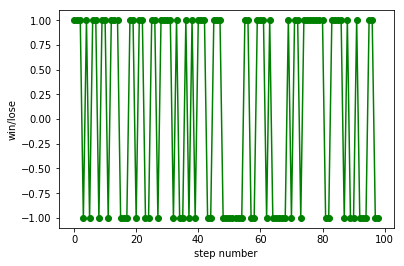

In [16]:
plt.plot(y, 'go-')
plt.xlabel('step number')
plt.ylabel('win/lose')

/home/bjackel/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'1D random walk')

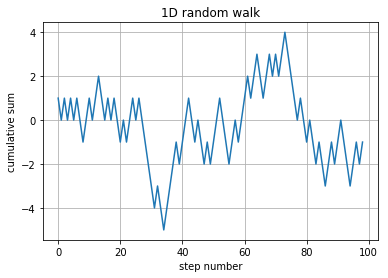

In [137]:
plt.plot(np.cumsum(y))
plt.grid('on')
plt.xlabel('step number')
plt.ylabel('cumulative sum')
plt.title('1D random walk')

Text(0.5,1,'Many random walks')

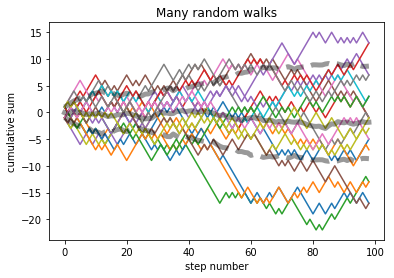

In [138]:
ystack = []
for i in range(19):
    y = np.random.rand(99)
    y = 1*(y>0.5) -1*(y<0.5)
    plt.plot(np.cumsum(y))
    ystack.append( np.cumsum(y) )
    
ystack = np.array(ystack)
plt.plot( np.mean(ystack, axis=0), 'k-', lw=5, alpha=0.4)
plt.plot( np.std(ystack, axis=0), 'k--', lw=5, alpha=0.4)
plt.plot( -np.std(ystack, axis=0), 'k--', lw=5, alpha=0.4)
plt.xlabel('step number')
plt.ylabel('cumulative sum')
plt.title('Many random walks')